<a href="https://colab.research.google.com/github/RenanNB360/Visao_Computacional_Colab/blob/main/Deep_Dream/deep_dream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregamento das bibliotecas e Importações

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.__version__

'2.13.0'

# Carregamento da rede neural pré-treinada

In [ ]:
modelo_base = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
modelo_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalizati

In [ ]:
len(modelo_base.layers)

311

In [ ]:
#names = ['mixed3', 'mixed5', 'mixed8', 'mixed9']
names = ['mixed3', 'mixed5']

In [ ]:
layers = [modelo_base.get_layer(nome).output for nome in names]
layers

[<KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed3')>,
 <KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed5')>]

In [ ]:
deep_dream_model = tf.keras.Model(inputs = modelo_base.input, outputs = layers)

In [ ]:
deep_dream_model.output

[<KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed3')>,
 <KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed5')>]

# Carregamento e pré-processamento da imagem

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
imagem = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Projects Computing Vision/Deep Dream/arquivos/StaryNight.jpg',
                                               target_size=(255,375))

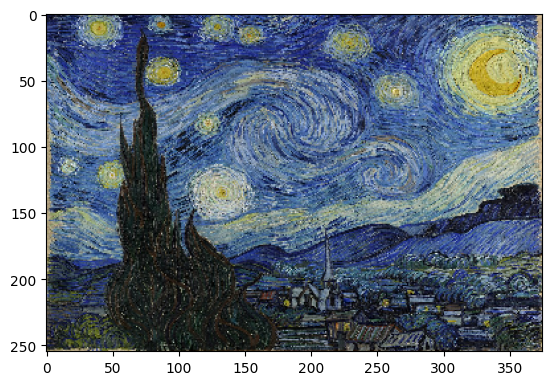

In [ ]:
plt.imshow(imagem)

In [ ]:
type(imagem)

PIL.Image.Image

In [ ]:
imagem.size

(375, 255)

In [ ]:
imagem.mode, len(imagem.mode)

('RGB', 3)

In [ ]:
list(imagem.getdata())

[(6, 10, 11),
 (30, 33, 66),
 (35, 46, 66),
 (39, 46, 65),
 (46, 49, 68),
 (23, 27, 39),
 (13, 15, 38),
 (57, 61, 86),
 (85, 88, 97),
 (147, 147, 139),
 (138, 139, 123),
 (112, 116, 117),
 (18, 21, 52),
 (23, 28, 60),
 (85, 96, 116),
 (83, 92, 121),
 (148, 152, 155),
 (29, 32, 63),
 (57, 63, 99),
 (12, 20, 39),
 (34, 39, 69),
 (23, 30, 56),
 (4, 12, 48),
 (25, 32, 74),
 (48, 50, 98),
 (134, 133, 173),
 (127, 132, 152),
 (126, 133, 161),
 (138, 151, 168),
 (64, 76, 126),
 (67, 83, 119),
 (61, 75, 112),
 (73, 90, 134),
 (86, 118, 143),
 (55, 81, 80),
 (136, 155, 135),
 (51, 65, 74),
 (152, 169, 195),
 (156, 176, 211),
 (56, 79, 129),
 (94, 116, 165),
 (70, 94, 120),
 (160, 173, 189),
 (142, 156, 185),
 (92, 118, 135),
 (50, 74, 118),
 (107, 132, 162),
 (101, 122, 153),
 (27, 36, 67),
 (34, 44, 79),
 (97, 114, 140),
 (21, 41, 66),
 (51, 60, 101),
 (50, 56, 104),
 (34, 39, 68),
 (22, 24, 45),
 (3, 3, 29),
 (4, 7, 22),
 (28, 37, 34),
 (19, 27, 29),
 (19, 25, 41),
 (43, 49, 75),
 (93, 104, 1

In [ ]:
imagem = tf.keras.preprocessing.image.img_to_array(imagem)
type(imagem)

numpy.ndarray

In [ ]:
imagem.shape

(255, 375, 3)

In [ ]:
imagem.min(), imagem.max()

(0.0, 255.0)

In [ ]:
imagem = tf.keras.applications.inception_v3.preprocess_input(imagem)

In [ ]:
imagem.min(), imagem.max()

(-1.0, 1.0)

# Ativações da rede neural

In [ ]:
imagem_batch = tf.expand_dims(imagem, axis = 0)
imagem_batch.shape

TensorShape([1, 255, 375, 3])

In [ ]:
ativacoes = deep_dream_model.predict(imagem_batch)

1/1 [==============================] - 9s 9s/step


In [ ]:
deep_dream_model.outputs

[<KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed3')>,
 <KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed5')>]

In [ ]:
len(ativacoes)

2

In [ ]:
ativacoes[0]

array([[[[0.19490622, 0.53703046, 0.        , ..., 3.0103712 ,
          0.04092545, 1.0168597 ],
         [0.21338844, 0.        , 1.5931597 , ..., 0.99260014,
          0.        , 1.0168597 ],
         [1.7747571 , 0.        , 0.637163  , ..., 1.9247773 ,
          0.7832616 , 0.19773774],
         ...,
         [0.        , 0.        , 0.        , ..., 1.5247897 ,
          0.26908997, 0.16858754],
         [0.        , 0.        , 0.46013045, ..., 2.0288486 ,
          0.5204176 , 0.        ],
         [1.8447515 , 0.        , 0.16393138, ..., 2.1395957 ,
          1.0429801 , 0.3696755 ]],

        [[0.        , 0.        , 0.        , ..., 1.9932777 ,
          0.04092545, 0.7995047 ],
         [0.        , 0.41623616, 0.        , ..., 1.1823183 ,
          0.        , 0.2511358 ],
         [0.28505155, 0.        , 0.        , ..., 1.1823183 ,
          0.        , 0.20665263],
         ...,
         [1.0671847 , 0.        , 0.        , ..., 0.40473852,
          0.        , 0.7

In [ ]:
ativacoes[0].shape, ativacoes[1].shape

((1, 14, 21, 768), (1, 14, 21, 768))

# Cálculo do erro (loss)

In [ ]:
def calcula_erro(imagem, network):
  imagem_batch = tf.expand_dims(imagem, axis = 0)
  ativacoes = network(imagem_batch)
  erros = []
  for ativacoes in ativacoes:
    media = tf.math.reduce_mean(ativacoes)
    erros.append(media)

  return tf.reduce_sum(erros)

In [ ]:
loss = calcula_erro(imagem, deep_dream_model)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.61425436>

# Subida do gradiente

In [ ]:
@tf.function
def deep_dream(network, imagem, learning_rate):
  with tf.GradientTape() as tape:
    tape.watch(imagem)
    erro = calcula_erro(imagem, network)

  gradientes = tape.gradient(erro, imagem)
  gradientes /= tf.math.reduce_std(gradientes)
  imagem = imagem + gradientes * learning_rate
  imagem = tf.clip_by_value(imagem, -1, 1)

  return erro, imagem

In [ ]:
def converte_imagem(imagem):
  imagem = 255 * (imagem + 1.0) / 2.0
  return tf.cast(imagem, tf.uint8)

In [ ]:
def executa_deep_dream(network, imagem, epocas, learning_rate):
  for epoca in range(epocas):
    erro, imagem = deep_dream(network, imagem, learning_rate)
    if epoca % 200 == 0:
      print(f'Época {epoca}, Loss {erro}')
  plt.figure(figsize=(12,12))
  plt.imshow(converte_imagem(imagem))
  plt.show()

# Geração de imagens

Época 0, Loss 0.6142542958259583
Época 200, Loss 1.6894409656524658
Época 400, Loss 2.005194664001465
Época 600, Loss 2.19112229347229
Época 800, Loss 2.329777956008911
Época 1000, Loss 2.450059413909912
Época 1200, Loss 2.5545852184295654
Época 1400, Loss 2.6492152214050293
Época 1600, Loss 2.732248306274414
Época 1800, Loss 2.80892276763916
Época 2000, Loss 2.8807058334350586
Época 2200, Loss 2.9468283653259277
Época 2400, Loss 3.0088024139404297
Época 2600, Loss 3.068850517272949
Época 2800, Loss 3.1252050399780273
Época 3000, Loss 3.17734432220459
Época 3200, Loss 3.224536895751953
Época 3400, Loss 3.2700297832489014
Época 3600, Loss 3.313443183898926
Época 3800, Loss 3.3551177978515625
Época 4000, Loss 3.394397258758545
Época 4200, Loss 3.4315648078918457
Época 4400, Loss 3.4675774574279785
Época 4600, Loss 3.501857280731201
Época 4800, Loss 3.5339102745056152
Época 5000, Loss 3.565678834915161
Época 5200, Loss 3.5962536334991455
Época 5400, Loss 3.6258792877197266
Época 5600, Los

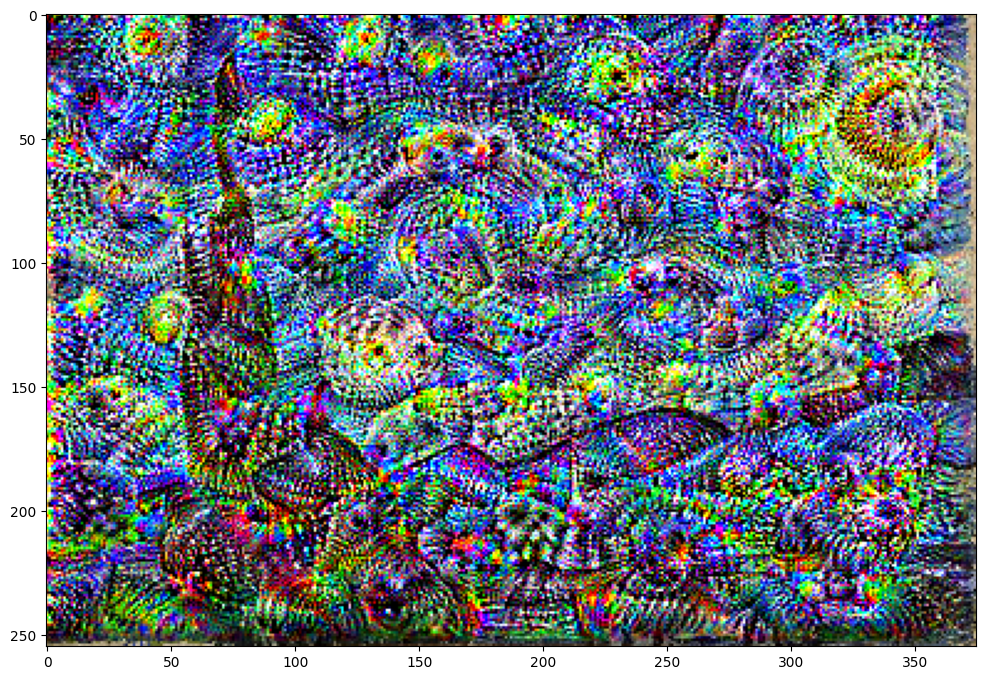

In [ ]:
executa_deep_dream(deep_dream_model, imagem, 8000, 0.001)

## Gerando outra imagem com learning rate menor

In [ ]:
imagem = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Projects Computing Vision/Deep Dream/arquivos/sky.jpeg', target_size=(225,375))

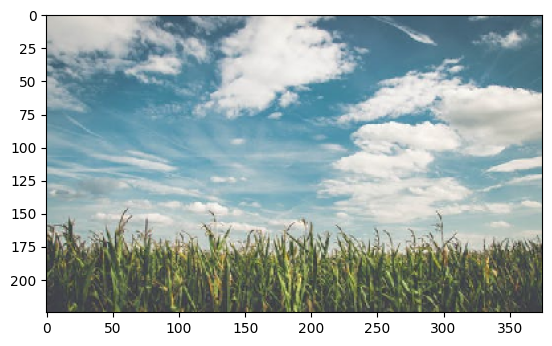

In [ ]:
plt.imshow(imagem)

In [ ]:
imagem = tf.keras.preprocessing.image.img_to_array(imagem)
imagem = tf.keras.applications.inception_v3.preprocess_input(imagem)

Época 0, Loss 0.6154928207397461
Época 200, Loss 0.9609713554382324
Época 400, Loss 1.1523289680480957
Época 600, Loss 1.2822306156158447
Época 800, Loss 1.3795241117477417
Época 1000, Loss 1.4573826789855957
Época 1200, Loss 1.522675633430481
Época 1400, Loss 1.5781466960906982
Época 1600, Loss 1.6264045238494873
Época 1800, Loss 1.6697309017181396
Época 2000, Loss 1.7094178199768066
Época 2200, Loss 1.745487928390503
Época 2400, Loss 1.778113603591919
Época 2600, Loss 1.8082835674285889
Época 2800, Loss 1.8361907005310059
Época 3000, Loss 1.862371563911438
Época 3200, Loss 1.886732578277588
Época 3400, Loss 1.9097492694854736
Época 3600, Loss 1.9314875602722168
Época 3800, Loss 1.9519264698028564
Época 4000, Loss 1.9710850715637207
Época 4200, Loss 1.989370584487915
Época 4400, Loss 2.0069217681884766
Época 4600, Loss 2.0240426063537598
Época 4800, Loss 2.0406880378723145
Época 5000, Loss 2.056520462036133
Época 5200, Loss 2.0717568397521973
Época 5400, Loss 2.0862512588500977
Época 

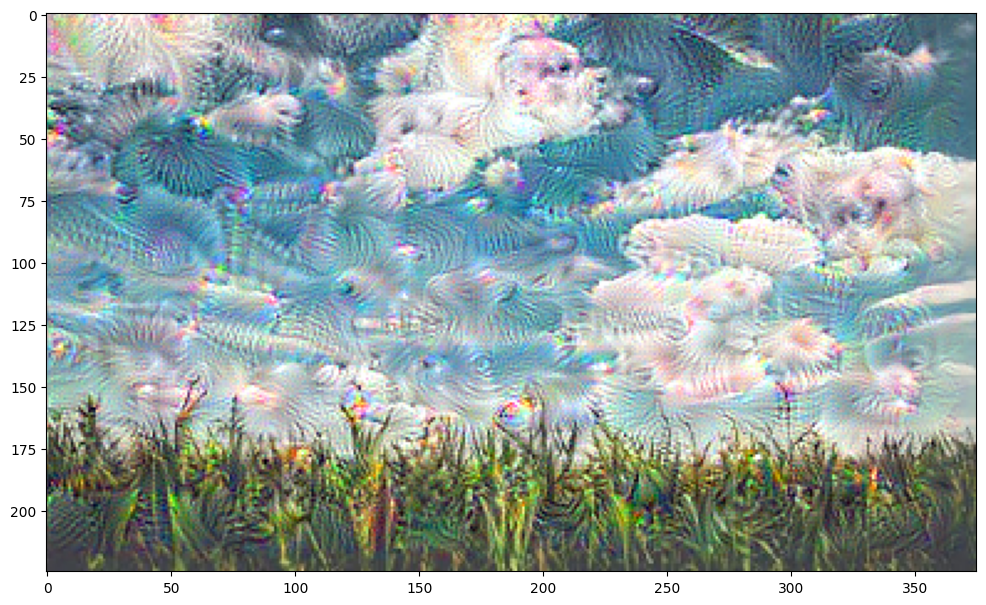

In [ ]:
executa_deep_dream(deep_dream_model, imagem, 8000, 0.0001)